<a href="https://colab.research.google.com/github/santiagoruizs/IML_Proyecto_Final/blob/master/colabs/Proyecto_IML_Telco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cargado de datos**

In [ ]:
!wget -O telco.csv 'https://raw.githubusercontent.com/sergiakalorth/MachineLearning-CIM-UPC/master/Final%20Project/datasets/Telco%20Custormer%20Churn/Telco-Customer-Churn.csv'

--2020-07-15 11:39:55--  https://raw.githubusercontent.com/sergiakalorth/MachineLearning-CIM-UPC/master/Final%20Project/datasets/Telco%20Custormer%20Churn/Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 970457 (948K) [text/plain]
Saving to: ‘telco.csv’

telco.csv           100%[===================>] 947.71K  --.-KB/s    in 0.1s    

2020-07-15 11:39:56 (7.47 MB/s) - ‘telco.csv’ saved [970457/970457]



In [ ]:
import pandas as pd
df = pd.read_csv('/content/telco.csv')

# Exploración


Se reliza una visualizacion previa para ver la estructura del dataframe


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Se ve que hay unas variables con tipo object y al investigar un poco es por que tienen algunos campos vacios, para esto hacemos lo siguiente para eliminar estos campos:


In [ ]:
import numpy as np
df = df.replace(" ",np.nan)


In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Eliminamos customer ID ya que no nos aporta información

In [ ]:
df=df.drop(columns = ["customerID"])

In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


En este paso se cambian variables de texto por variables numericas, para asi poderlas graficar y aplicar los modelos de ML

In [ ]:
from sklearn import preprocessing
col = df.select_dtypes(include = 'object').columns
le = preprocessing.LabelEncoder()
for i in col:
  le.fit(df[i].astype(str))  
  df[i] = le.transform(df[i].astype(str))


Ya con todas las variables numericas realizamos una umputacion con el KNNImputer de sklearn

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputed_data = imputer.fit_transform(df)

df_imputed = pd.DataFrame(imputed_data,columns=df.columns)
df_imputed.loc[df['TotalCharges'].isna()==True]['TotalCharges']

488     54.225
753     20.400
936     80.550
1082    25.200
1340    55.150
3331    20.000
3826    25.200
4380    20.000
5218    19.925
6670    74.225
6754    97.875
Name: TotalCharges, dtype: float64

In [ ]:
df_imputed.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df_imputed.head(100)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0.0,0.0,0.0,34.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0.0,0.0,0.0,45.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,12.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,78.95,927.35,1.0
96,1.0,0.0,1.0,1.0,71.0,1.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,66.85,4748.70,0.0
97,1.0,0.0,0.0,0.0,5.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,21.05,113.85,1.0
98,1.0,0.0,0.0,0.0,52.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,21.00,1107.20,0.0


Aqui se enseña un pairplot con el fin de ver que informacion importante sobre el Churn se puede observar desde las variables


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


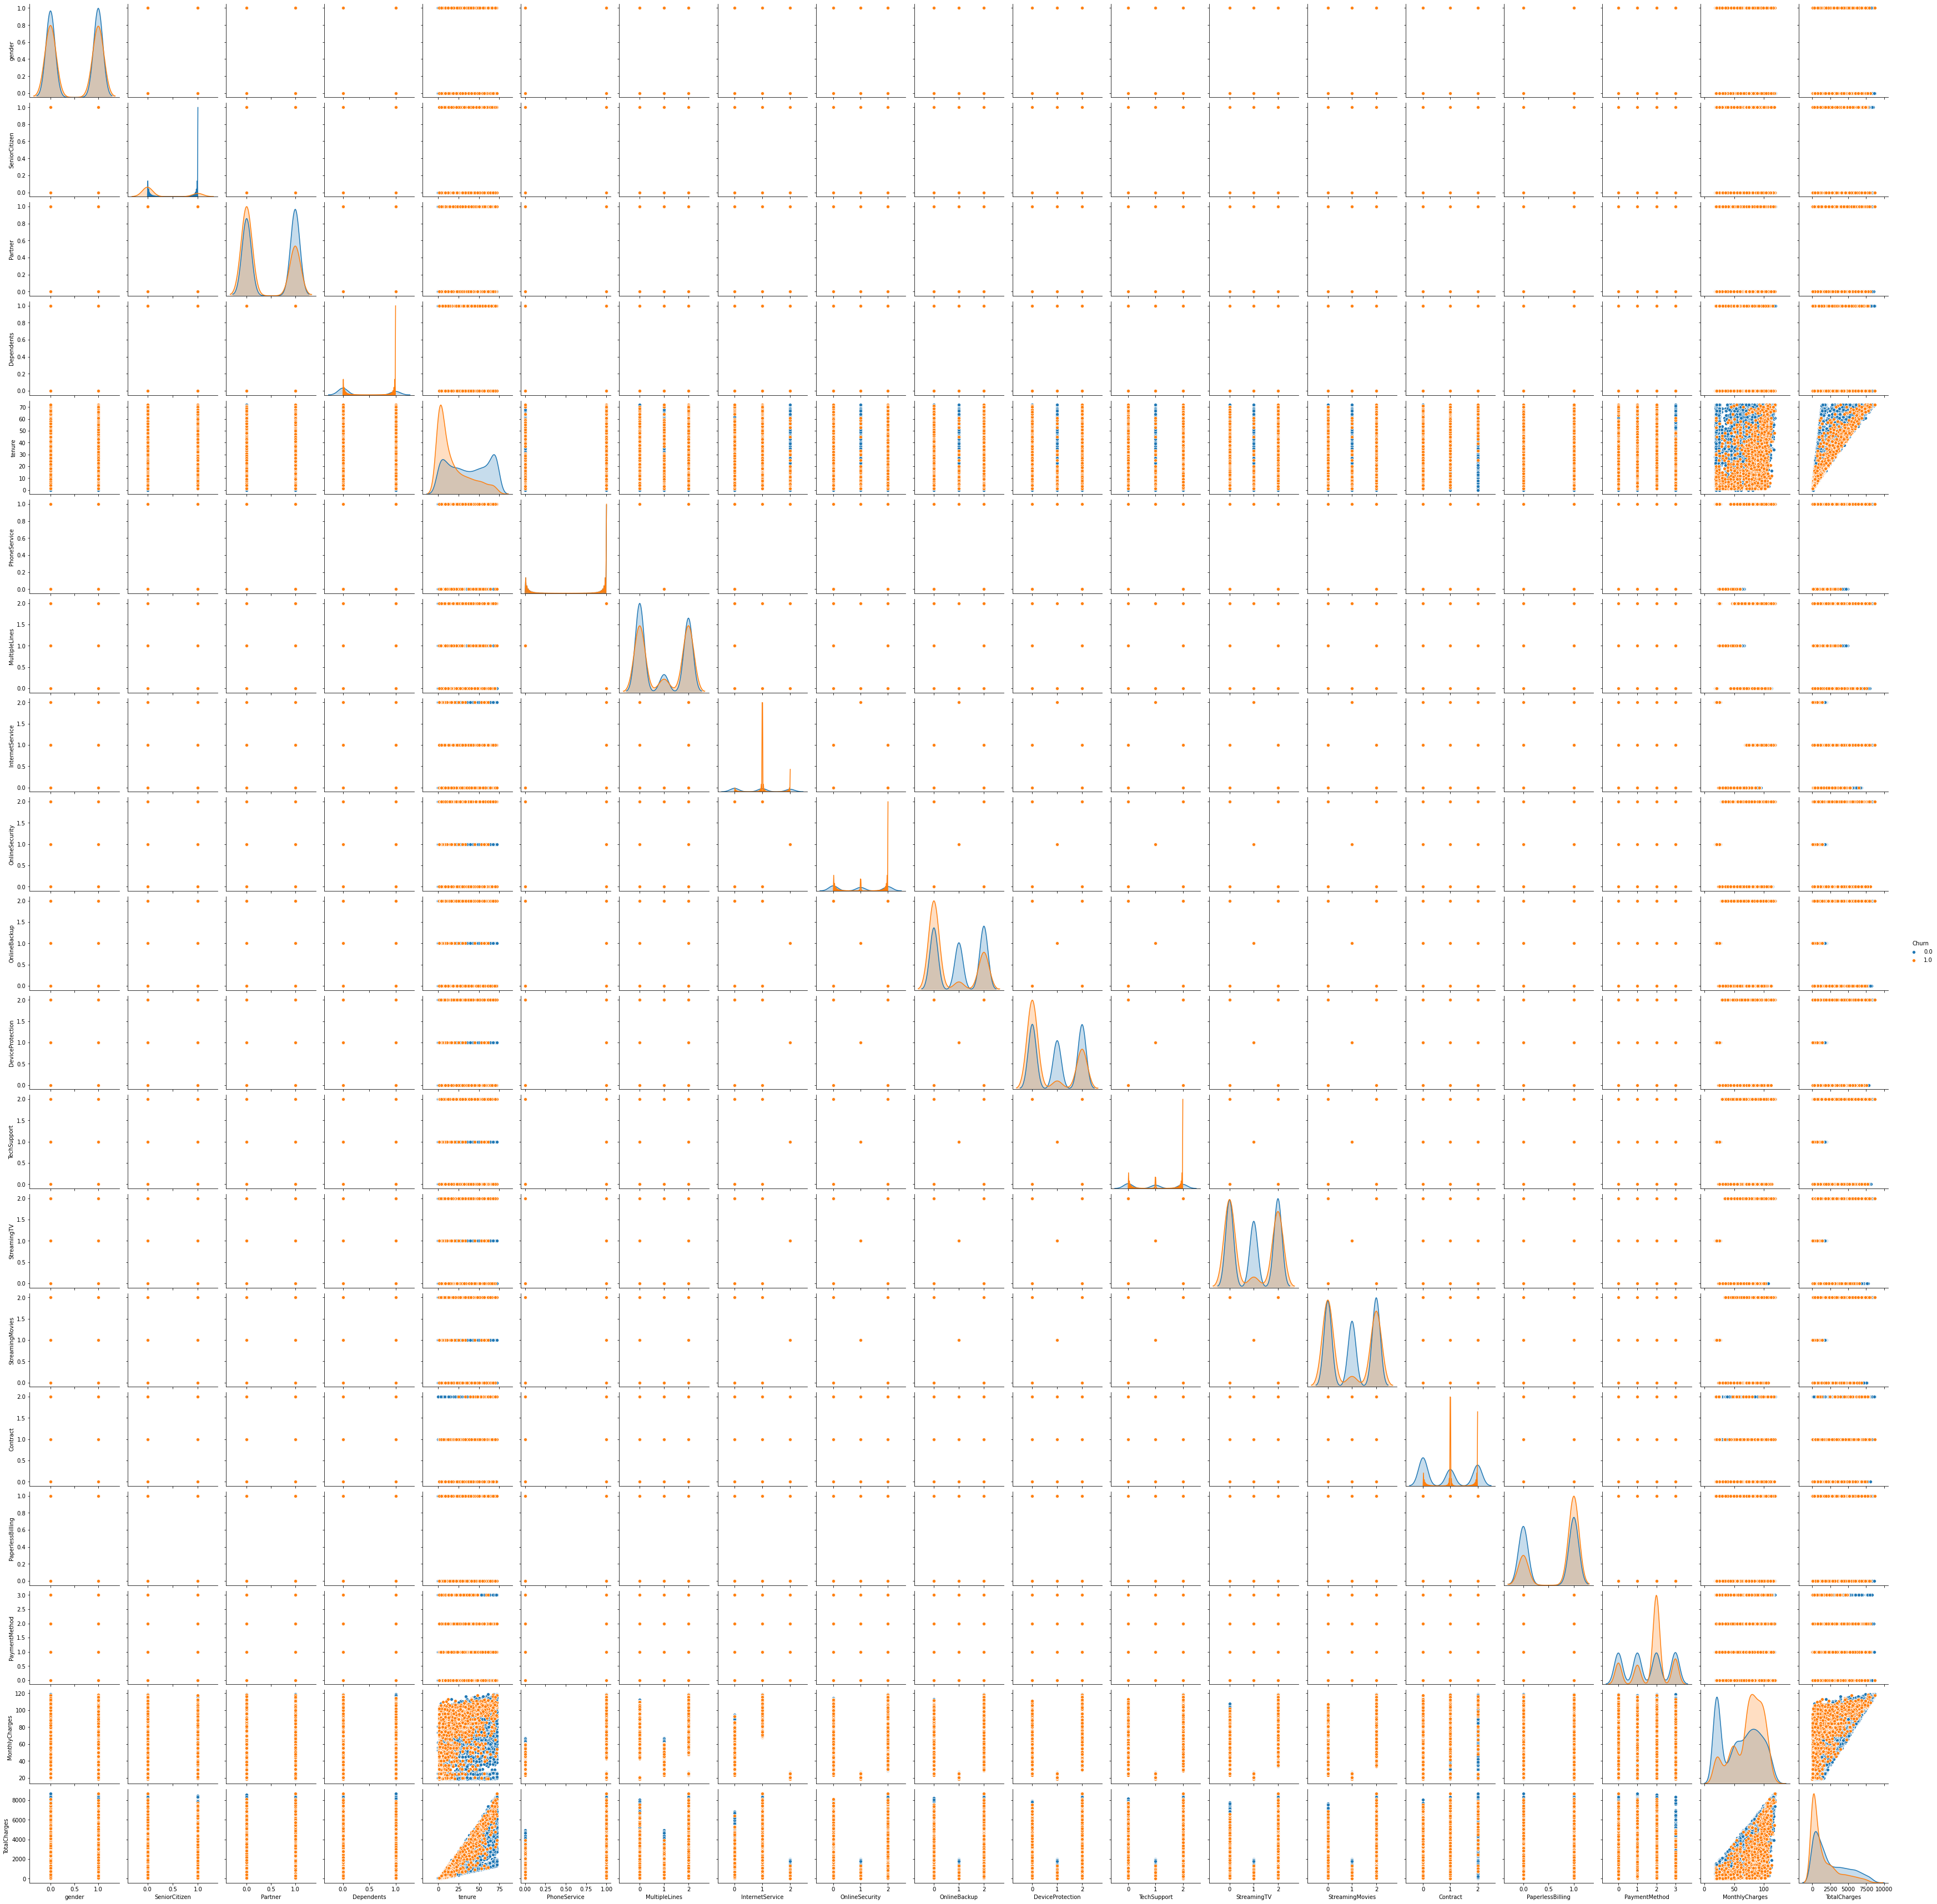

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_imputed, hue ="Churn")
plt.show()

Acontinuacion se extraen graficas del pairplot de las cuales se puede obtener informacion

In [ ]:
df_ch0=df_imputed.where(df_imputed.Churn == 0).dropna()
df_ch1=df_imputed.where(df_imputed.Churn == 1).dropna()


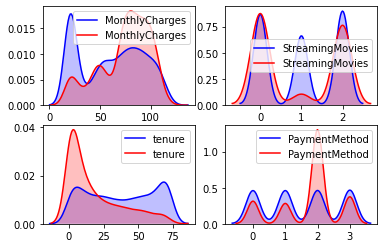

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplot(221)
ax = sns.kdeplot(df_ch0.MonthlyCharges,  shade=True, color="b", legend = 'True')
bx = sns.kdeplot(df_ch1.MonthlyCharges, shade=True, color="r", legend = 'True')
plt.subplot(222)
ax = sns.kdeplot(df_ch0.StreamingMovies,  shade=True, color="b", legend = 'True')
bx = sns.kdeplot(df_ch1.StreamingMovies, shade=True, color="r", legend = 'True')
plt.subplot(223)
ax = sns.kdeplot(df_ch0.tenure,  shade=True, color="b", legend = 'True')
bx = sns.kdeplot(df_ch1.tenure, shade=True, color="r", legend = 'True')
plt.subplot(224)
ax = sns.kdeplot(df_ch0.PaymentMethod,  shade=True, color="b", legend = 'True')
bx = sns.kdeplot(df_ch1.PaymentMethod, shade=True, color="r", legend = 'True')



Con esto se ve que las siguientes variables son las que muestran algo interesante en el pairplot, en donde ciertos comportamientos se ven reflejados en la agrupacion por churn

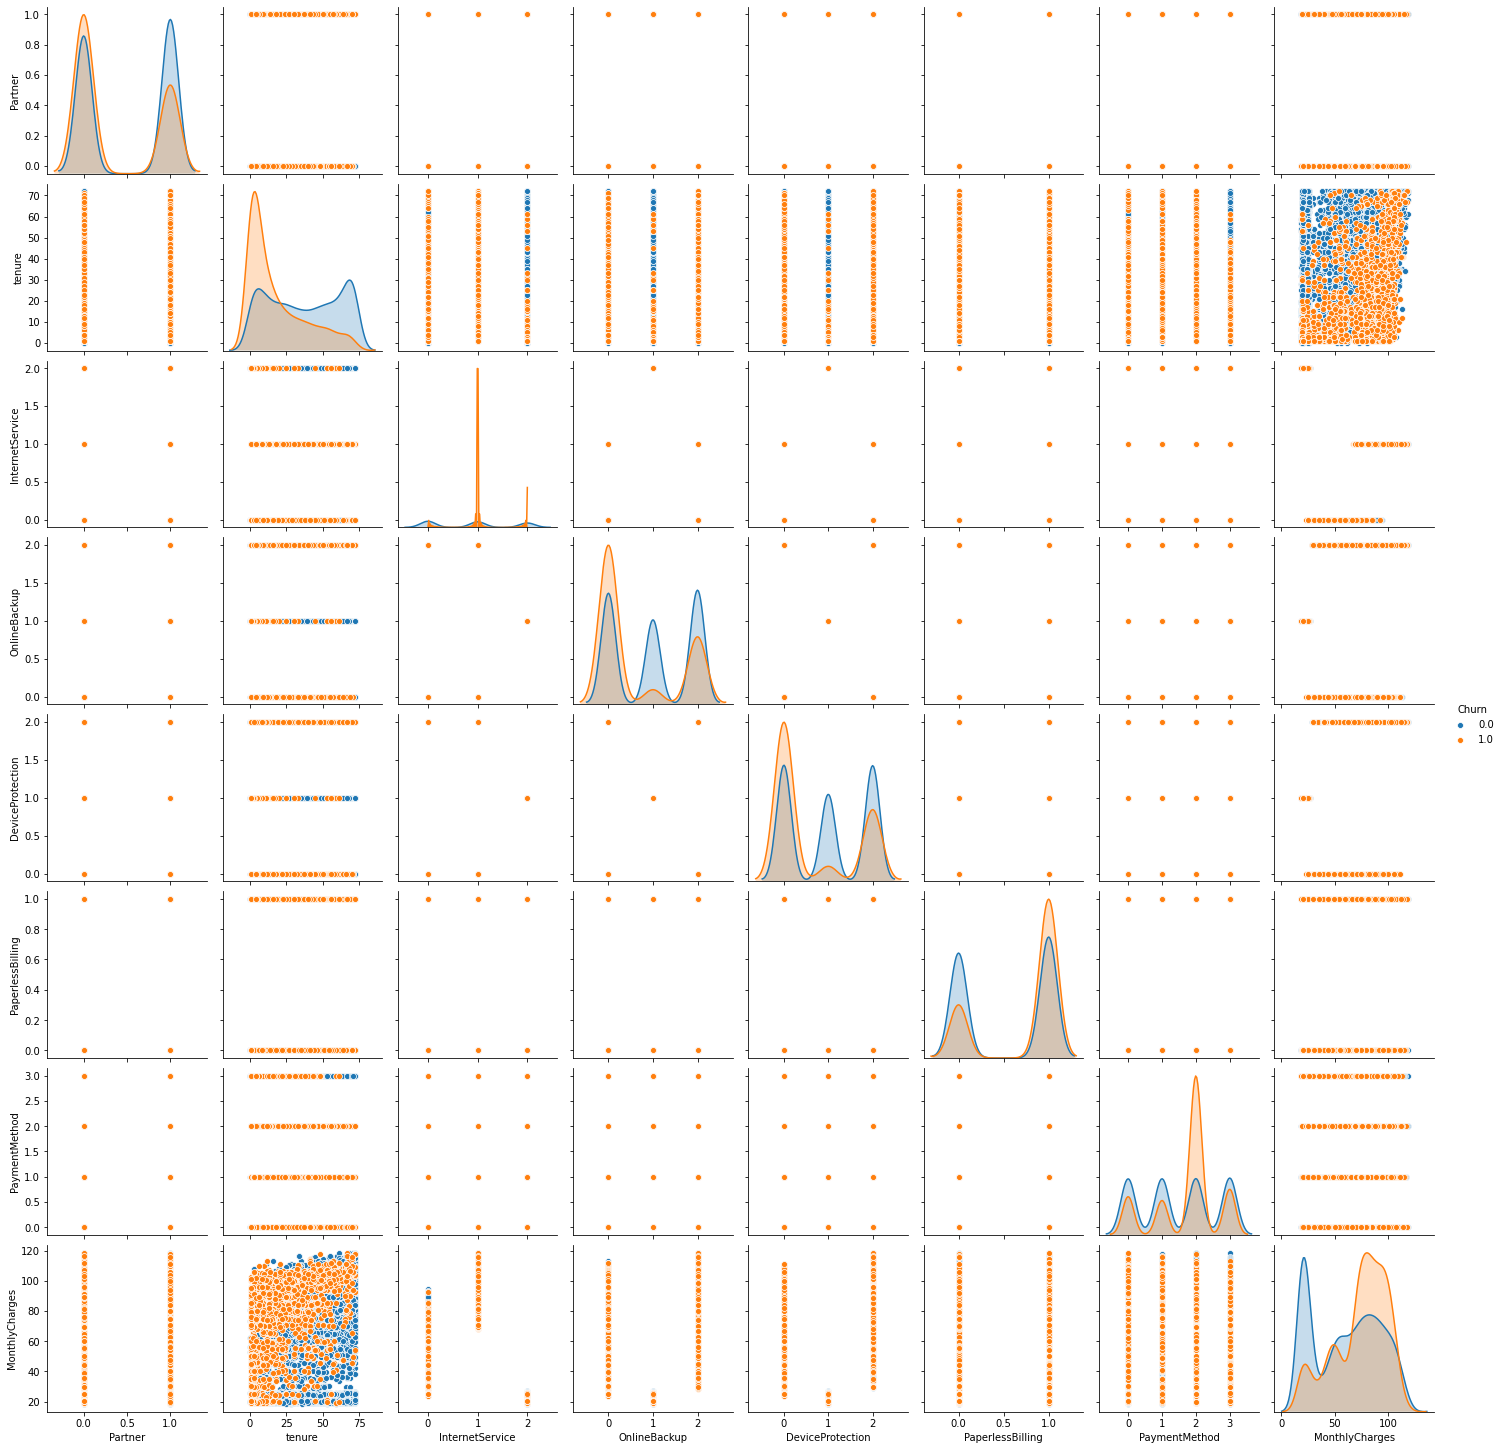

In [ ]:
g = sns.pairplot(df_imputed,
                 vars=['Partner','tenure', 'InternetService', 'OnlineBackup', 'DeviceProtection','PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges'], hue= 'Churn')

Analizando estas graficas se propone al equipo de ventas en enfatizar en puntos como, los precios, estudiar la competencia para ver como se esta en comparacion precio/servicio. En las plataformas de stream y en la formas de pago electronicas y automaticas.

# Algoritmos de Clasificación

In [ ]:
!apt-get install swig -y
!pip install python numpy
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (1,335 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpa

In [ ]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
X1= df_imputed.drop(columns = ["Churn"])
y = df_imputed.Churn
scaler = StandardScaler()

X=scaler.fit_transform(X1)

In [ ]:

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.4, random_state=0)

In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(
          time_left_for_this_task=360, 
          per_run_time_limit=30,
          )

# train model(s)
automl.fit(X_train, y_train)

# evaluate
y_hat = automl.predict(X_test)
test_acc = sklearn.metrics.accuracy_score(y_test, y_hat)


[WARNING] [2020-07-15 12:46:39,169:EnsembleBuilder(1):08f3fa56ade7f51f9ad378a9e5e24608] Memory Exception -- restart with less ensemble_nbest: 25
[WARNING] [2020-07-15 12:47:06,664:EnsembleBuilder(1):08f3fa56ade7f51f9ad378a9e5e24608] Memory Exception -- restart with less ensemble_nbest: 12


In [ ]:
print("Test Accuracy score {0}".format(test_acc))
print(automl.sprint_statistics())
print(automl.show_models())

Test Accuracy score 0.8066004258339248
auto-sklearn results:
  Dataset name: 08f3fa56ade7f51f9ad378a9e5e24608
  Metric: accuracy
  Best validation score: 0.797133
  Number of target algorithm runs: 58
  Number of successful target algorithm runs: 51
  Number of crashed target algorithm runs: 5
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 1

[(0.360000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'gradient_boosting', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:__choice__': 'select_rates', 'classifier:gradient_boosting:early_stop': 'valid', 

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
GB= GradientBoostingClassifier(random_state=20)
GB.fit(X_train, y_train)
acc = GB.score(X_test, y_test)
print('Accuracy: ', acc)

Accuracy:  0.8019872249822569


In [33]:

from sklearn.ensemble import RandomForestClassifier  # importing model to use for our prediction
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

RFC = RandomForestClassifier(max_depth = 6, min_samples_split = 4, n_estimators = 500,random_state = 20, n_jobs = -1)
RFC.fit(X_train, y_train) 
train_prediction = RFC.predict(X_train)

print("Con el conjunto test la accuracy es de {}.".format(accuracy_score(y_test, test_pred)))

Con el conjunto test la accuracy es de 0.8005677785663591.


In [32]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
tp = clf.predict(X_train)


testp = clf.predict(X_test)
print("Con el conjunto test la accuracy es de {}.".format(accuracy_score(y_test, testp)))


Con el conjunto test la accuracy es de 0.7959545777146912.


In [ ]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(loss="perceptron", eta0=0.1, learning_rate="constant", penalty=None)
SGD.fit(X_train, y_train)
y_pred2 = SGD.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred2))

Accuracy: 0.71
